In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import minimize
from findpeaks import findpeaks
from quadprog import solve_qp
# from sklearn.model_selection import GridSearchCV

In [2]:
from module.auto_peak_valley import Peak_Valley_Simu, IsotonicReg, constrained_splines_reg, comprehensive_csr
from module.knot_func import *

In [3]:
def f(x):
    return np.sin(4*np.pi*x)

In [4]:
np.random.seed(42)
x = np.linspace(0, 1, 1000).round(5)
y = f(x) + np.random.normal(scale=0.3, size=(1000,))

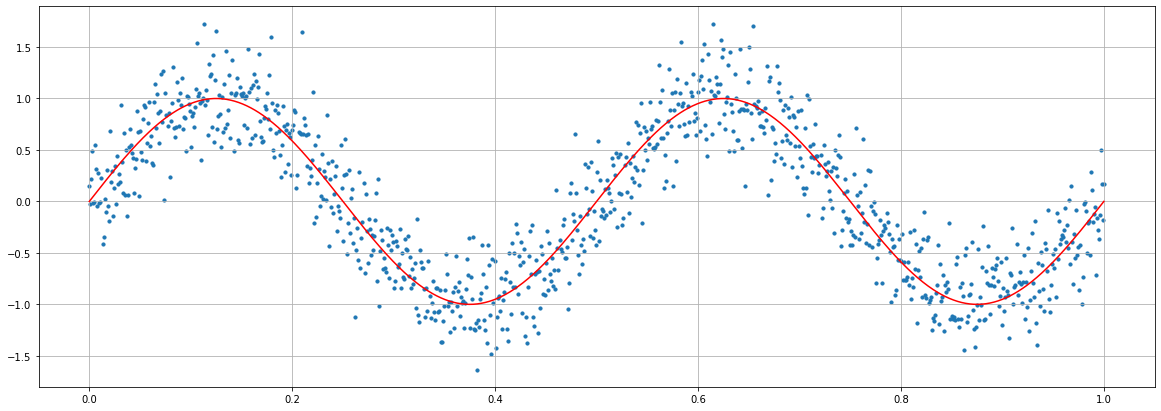

In [5]:
plt.figure(figsize=(20, 7))
plt.scatter(x, y, s=10)
plt.plot(x, f(x), c="r")
plt.grid()
plt.show()

In [6]:
multi_peak = Peak_Valley_Simu()
multi_peak.x, multi_peak.y = x, y

In [7]:
auto_multi_init_demarcation, auto_multi_peak_detection_result, auto_multi_peak_detection_dict = \
    multi_peak.auto_peak_points_detection_v3(step=0.02, distance=0.1, iter_scale=1)
print("峰座標：", auto_multi_peak_detection_result)
print(auto_multi_init_demarcation)

auto_multi_initvalley_demarcation, auto_multi_valley_detection_result, auto_multi_valley_detection_dict = \
    multi_peak.auto_valley_points_detection(step=0.02, distance=0.1, iter_scale=1)
print("谷座標：", auto_multi_valley_detection_result)
# print(auto_multi_initvalley_demarcation)

峰座標： deque([0.12012, 0.5996])
deque([0.12012], maxlen=1)
谷座標： deque([0.38038, 0.87988])


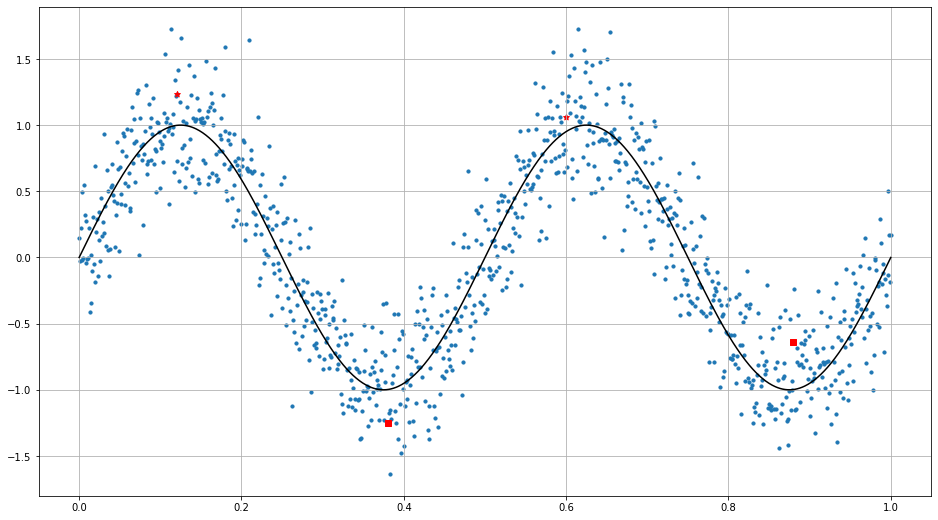

In [8]:
peak_x = list(auto_multi_peak_detection_result)
peak_y = y[[x.tolist().index(i) for i in peak_x]]
valley_x = list(auto_multi_valley_detection_result)
valley_y = y[[x.tolist().index(i) for i in valley_x]]
plt.figure(figsize=(16,9))
plt.scatter(x, y, s=10)
plt.plot(x, f(x), c="k")
plt.scatter(peak_x, peak_y, c="r", marker='*')
plt.scatter(valley_x, valley_y, c="r", marker='s')
plt.grid()
plt.show()

In [9]:
step_list = [0.01, 0.02, 0.05]
distance_list = [0.05, 0.1, 0.15]

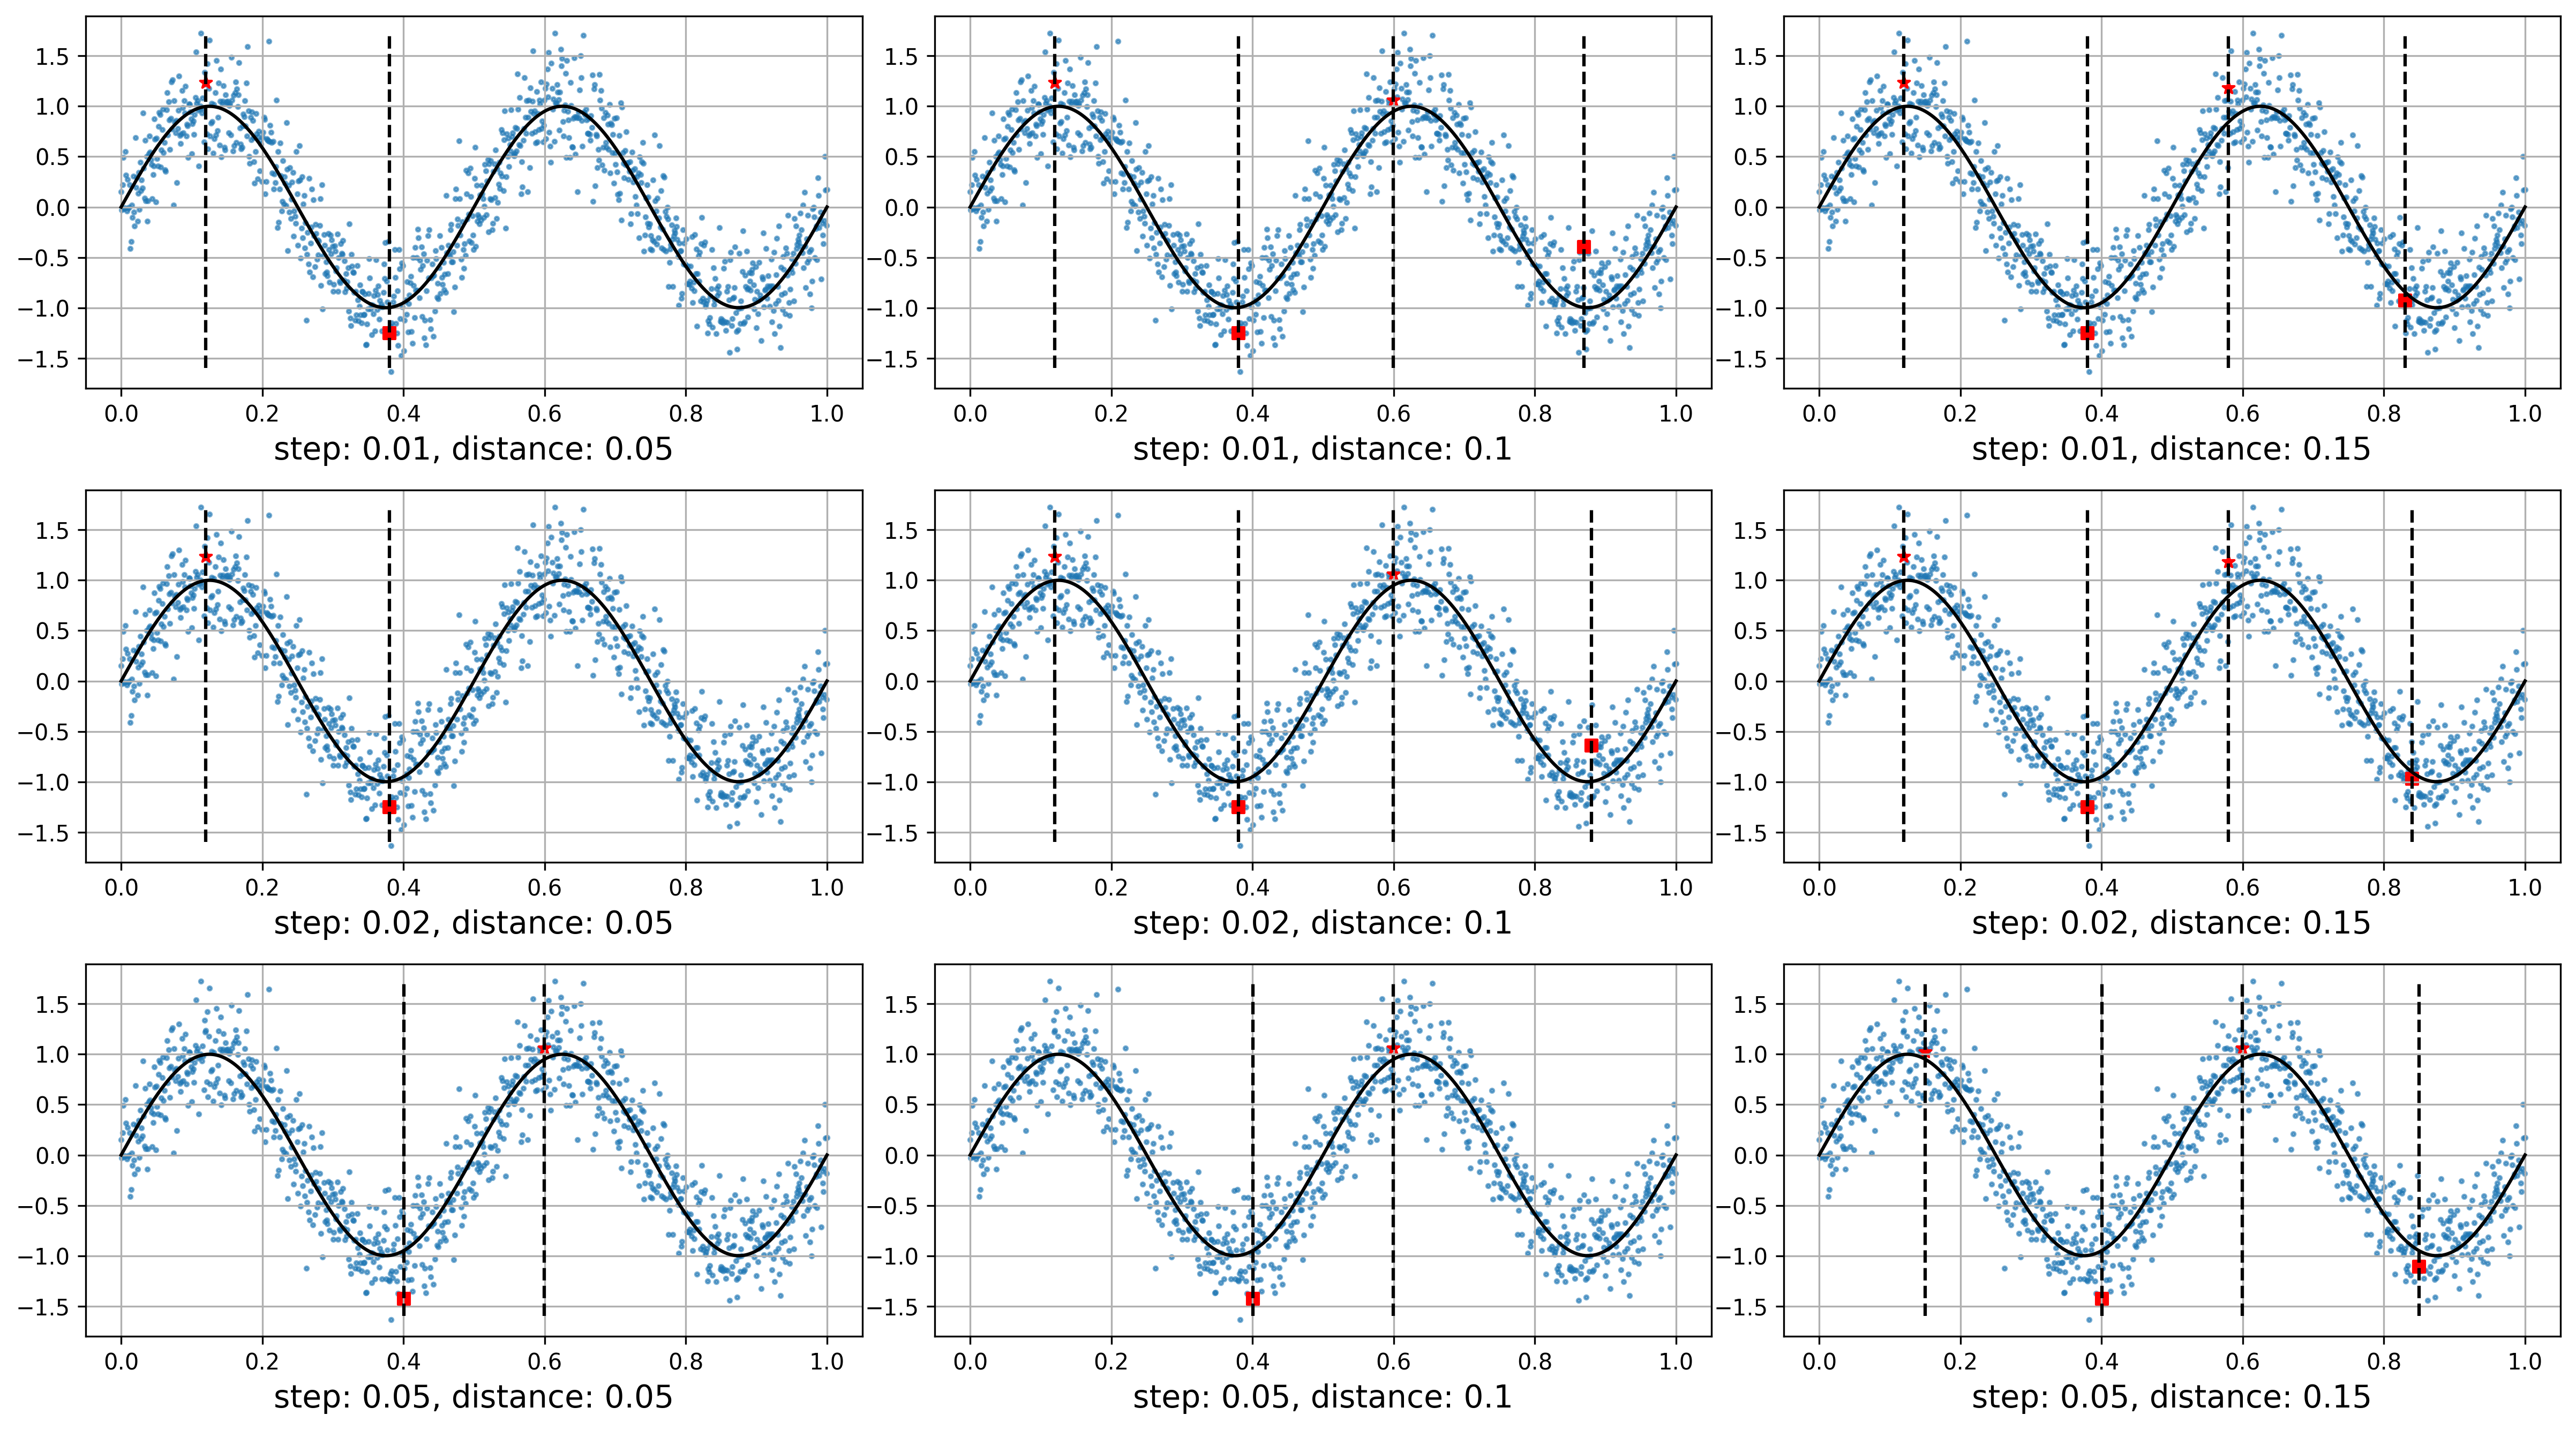

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(16, 9), dpi=300)
for (id1, s) in enumerate(step_list):
    for (id2, d) in enumerate(distance_list):
        init_demarcation, peak_detection_result, peak_detection_dict = \
            multi_peak.auto_peak_points_detection_v3(step=s, distance=d, iter_scale=1)
        initvalley_demarcation, valley_detection_result, valley_detection_dict = \
            multi_peak.auto_valley_points_detection(step=s, distance=d, iter_scale=1)
        peak_x = list(peak_detection_result)
        peak_y = y[[x.tolist().index(i) for i in peak_x]]
        valley_x = list(valley_detection_result)
        valley_y = y[[x.tolist().index(i) for i in valley_x]]
        axs[id1, id2].scatter(x, y, s=3, alpha=0.6)
        axs[id1, id2].plot(x, f(x), c="k")
        axs[id1, id2].scatter(peak_x, peak_y, s=30, c="r", marker='*')
        axs[id1, id2].scatter(valley_x, valley_y, s=30, c="r", marker='s')
        axs[id1, id2].vlines(x=peak_x+valley_x, ymin=-1.6, ymax=1.7, colors="k", linestyles="dashed")
        axs[id1, id2].grid()
        # axs[id1, id2].set(xlabel=f"step: {s}, distance: {d}")
        axs[id1, id2].set_xlabel(xlabel=f"step: {s}, distance: {d}", fontdict={"fontsize":14})
fig.tight_layout()

In [11]:
# fig.savefig("E:\\Meeting\\Master Thesis\\figure\\full_figure.png")

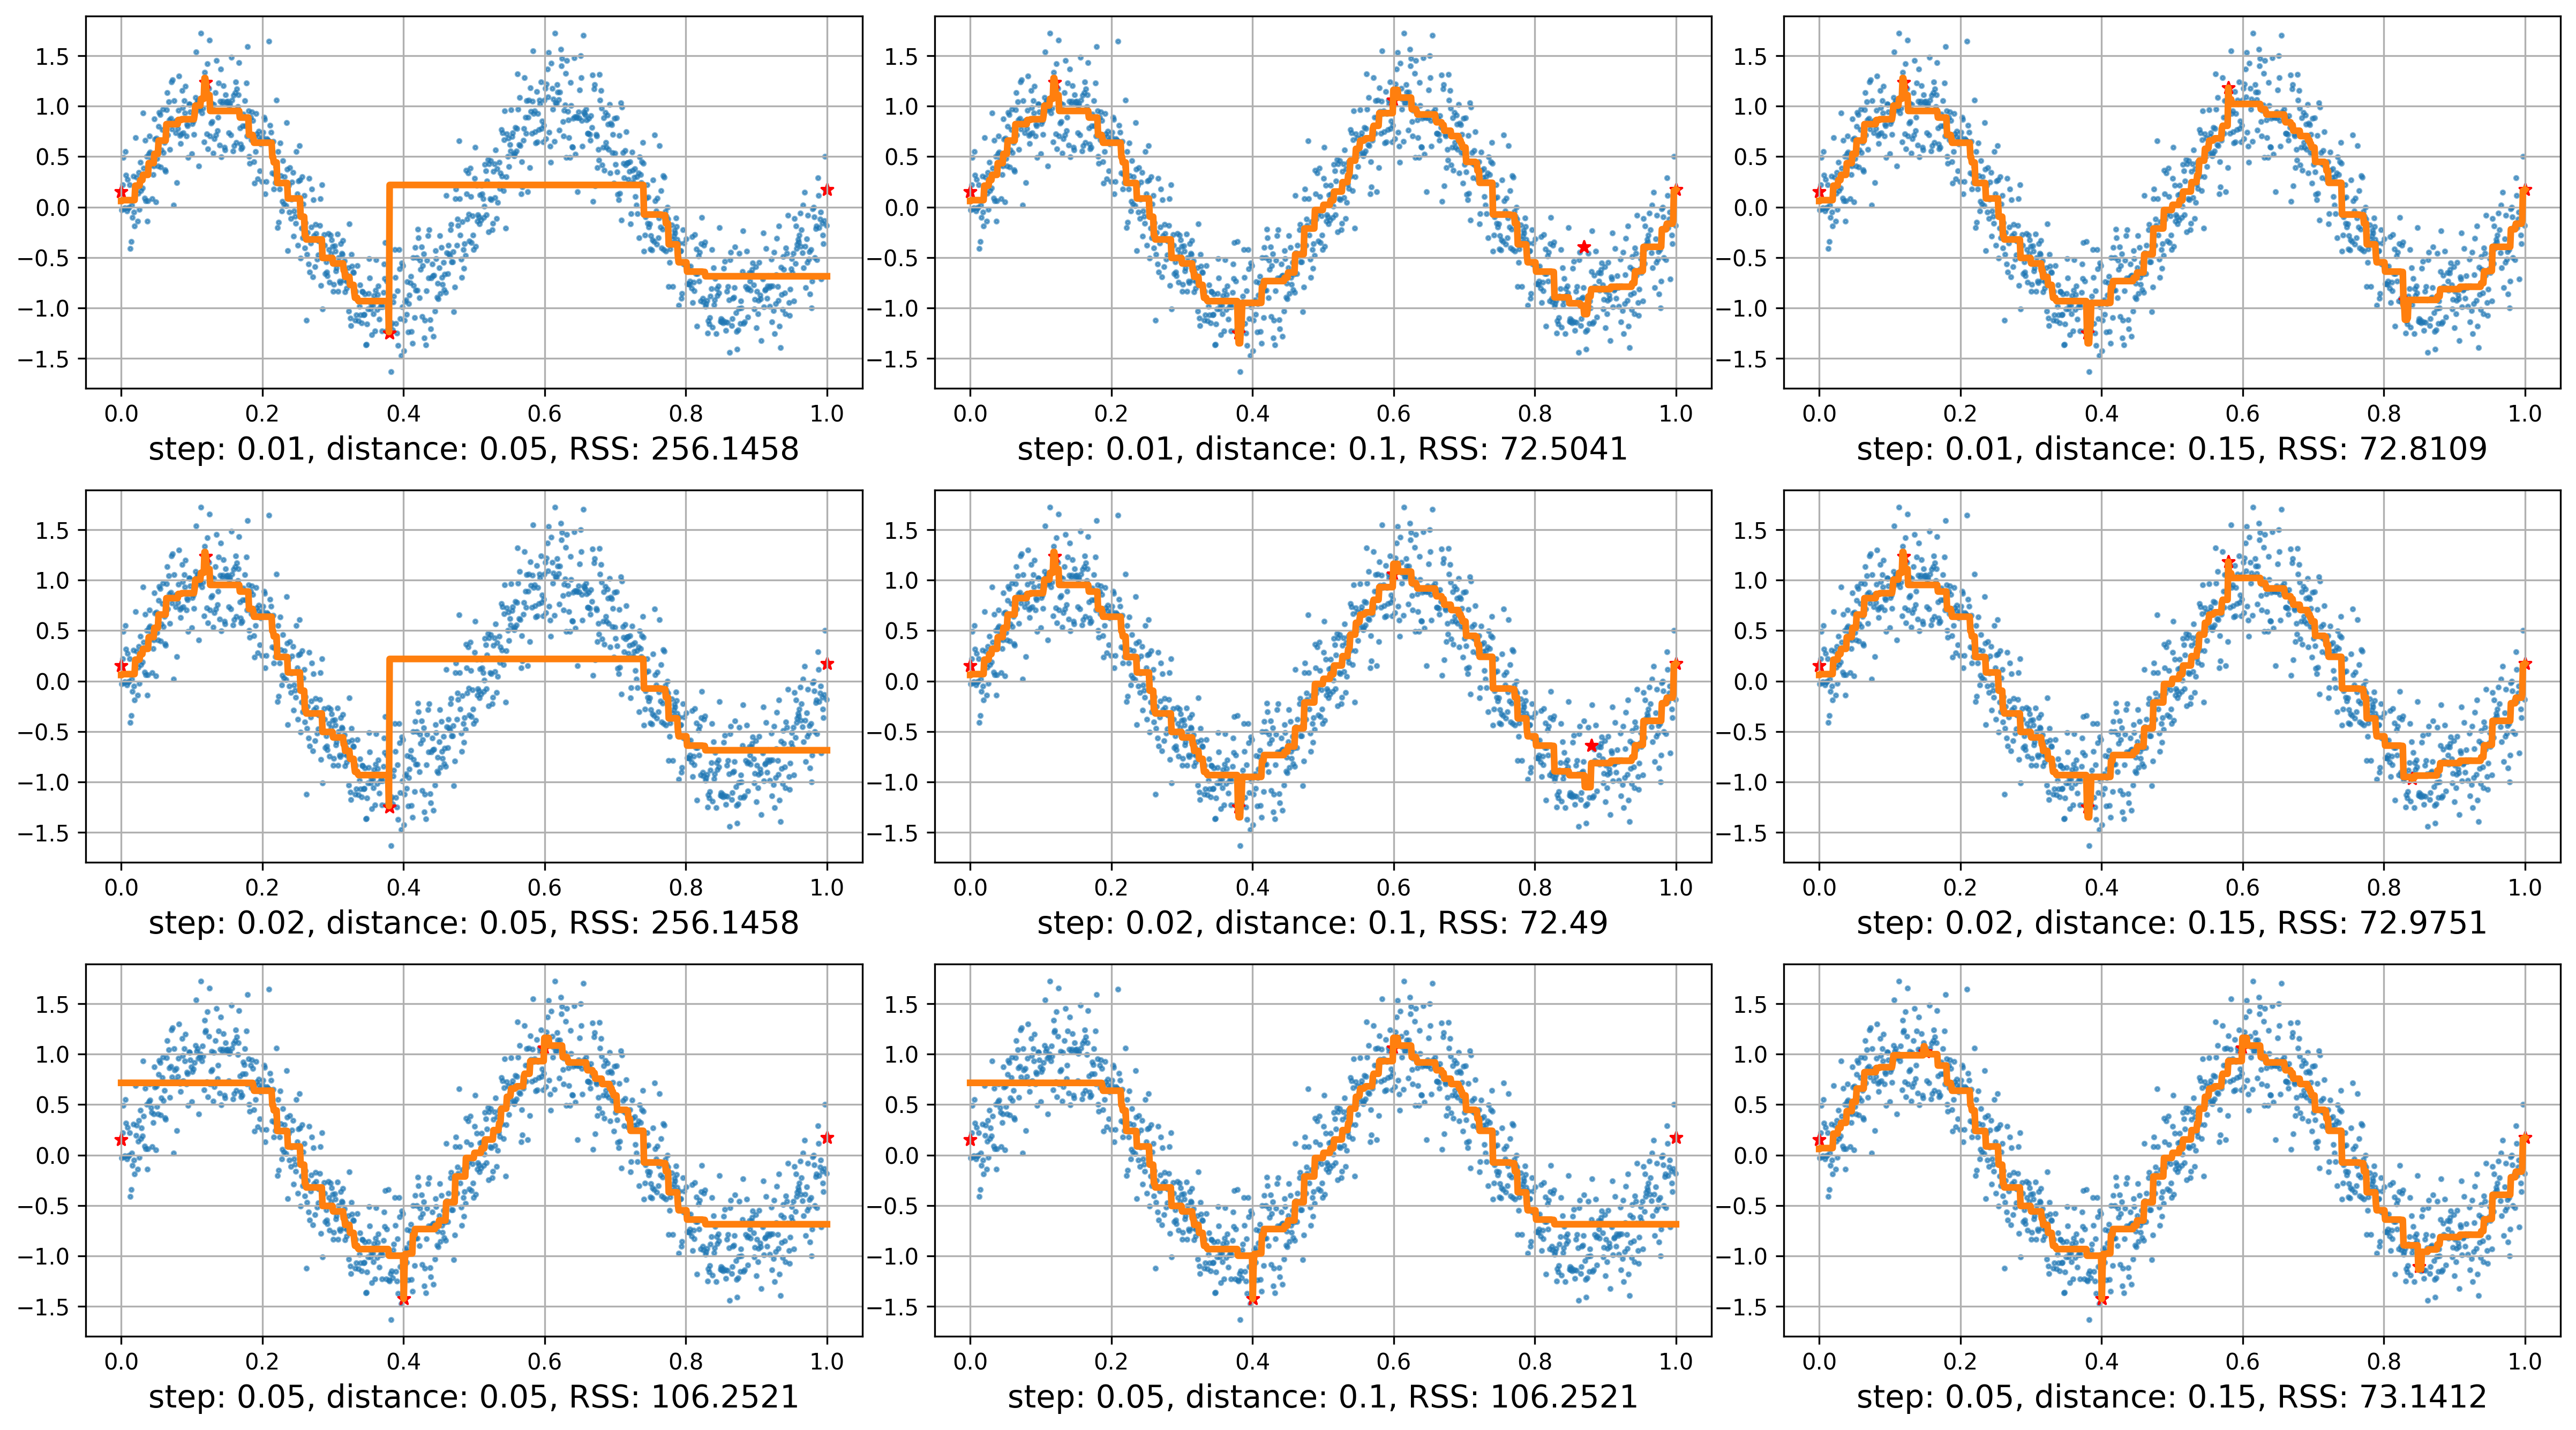

In [10]:
fig_iso, axs_iso = plt.subplots(3, 3, figsize=(16, 9), dpi=300)
for (id1, s) in enumerate(step_list):
    for (id2, d) in enumerate(distance_list):
        init_demarcation, peak_detection_result, peak_detection_dict = \
            multi_peak.auto_peak_points_detection_v3(step=s, distance=d, iter_scale=1)
        initvalley_demarcation, valley_detection_result, valley_detection_dict = \
            multi_peak.auto_valley_points_detection(step=s, distance=d, iter_scale=1)
        peak_x = list(peak_detection_result)
        valley_x = list(valley_detection_result)
        p_index = [x.tolist().index(i) for i in peak_x]
        v_index = [x.tolist().index(i) for i in valley_x]
        pv_index = sorted(p_index+v_index+[0, 999])
        
        multi_pv_isoreg = IsotonicReg(x=x, y=y, pv_index=pv_index)
        multi_pv_isoreg.iso_fit_transform()
        axs_iso[id1, id2].scatter(x, y, s=3, alpha=0.6)
        axs_iso[id1, id2].scatter(x[pv_index], y[pv_index], s=30, c="r", marker='*')
        axs_iso[id1, id2].plot(multi_pv_isoreg.x, multi_pv_isoreg.y_predicted, c="tab:orange", linewidth=3)
        axs_iso[id1, id2].grid()
        # axs_iso[id1, id2].set(xlabel=f"step: {s}, distance: {d}, RSS: {round(multi_pv_isoreg.isotonic_rss(), 4)}")
        axs_iso[id1, id2].set_xlabel(xlabel=f"step: {s}, distance: {d}, RSS: {round(multi_pv_isoreg.isotonic_rss(), 4)}", fontdict={"fontsize":14})
fig_iso.tight_layout()

In [13]:
fig_iso.savefig("E:\\Meeting\\Master Thesis\\figure\\full_figure_iso.png")